**Topic:**        Challenge Set 6  
**Subject:**      Linear Regression and Learning Curve Challenges  
**Date:**         10/9/2017  
**Name:**         Laura Howard

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn import preprocessing

%matplotlib inline

### Challenge 1

In [2]:
B0 = 10
B1 = 0.6
x = np.logspace(0, 5, num = 1000)
epsilon = np.random.normal(0,.5, size=1000)

y = B0 + B1*np.log(x) + epsilon
df = pd.DataFrame({'Y':y, 'X':x})

In [3]:
df['log_X'] = np.log(df['X'])

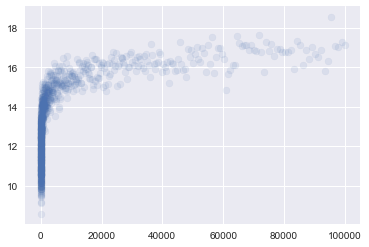

In [4]:
plt.scatter(x,y, alpha=.1)

In [5]:
X = df

y = df['Y']

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [8]:
poly2 = preprocessing.PolynomialFeatures(degree=2)

In [9]:
X_train_poly2 = poly2.fit_transform(X_train.loc[:,['X']])
X_test_poly2 = poly2.transform(X_test.loc[:,['X']])

In [10]:
lr_model1 = LinearRegression()
lr_model1.fit(X_train_poly2,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [11]:
# Quadratic model fits poorly
lr_model1.score(X_test_poly2, y_test)

0.5120519478272354

In [12]:
test_set_pred1 = lr_model1.predict(X_test_poly2)

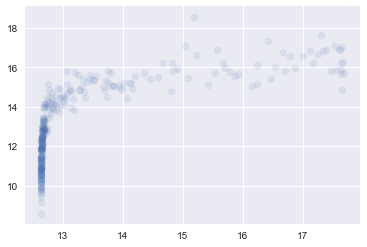

In [13]:
# Plot actual versus predicted
plt.scatter(test_set_pred1,y_test,alpha=.1);

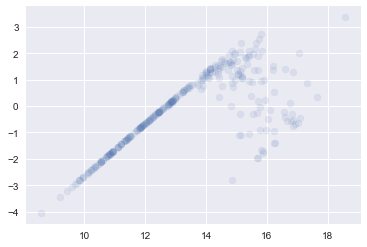

In [14]:
# Plot residuals
plt.scatter(y_test,y_test-test_set_pred1,alpha=.1);

In [15]:
lr_model2 = LinearRegression()
lr_model2.fit(X_train.loc[:,['log_X']],y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [16]:
# logarithmic model fits really well
lr_model2.score(X_test.loc[:,['log_X']], y_test)

0.93693667284331139

In [17]:
lr_model2.score(X_train.loc[:,['log_X']], y_train)

0.93915769064247656

In [18]:
test_set_pred2 = lr_model2.predict(X_test.loc[:,['log_X']])

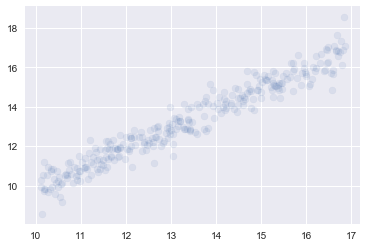

In [19]:
# Plot actual versus predicted
plt.scatter(test_set_pred2,y_test,alpha=.1);

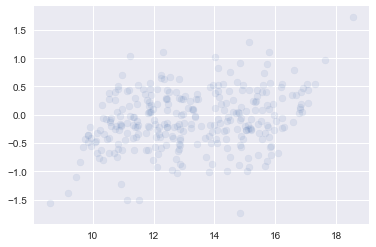

In [20]:
# Plot residuals
plt.scatter(y_test,y_test-test_set_pred2,alpha=.1);

### Challenge 2

In [50]:
B0 = 10
B1 = 0.6
B2 = 2
x = np.linspace(0, 1000, num = 100)
epsilon = np.random.normal(0,100000, size=100)

y = B0 + B1*x + B2*x*x + epsilon
df2 = pd.DataFrame({'Y':y, 'X':x})

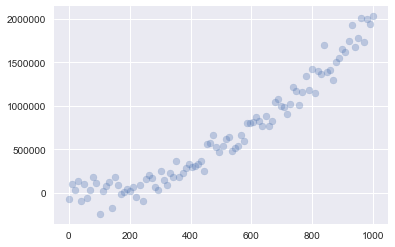

In [51]:
plt.scatter(x,y, alpha=.3);

In [52]:
X2 = df2

y2 = df2['Y']

In [53]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.3)

In [54]:
poly3 = preprocessing.PolynomialFeatures(degree=2)

In [55]:
X2_train_poly3 = poly3.fit_transform(X2_train.loc[:,['X']])

In [56]:
X2_test_poly3 = poly3.transform(X2_test.loc[:,['X']])

In [57]:
lr_model3 = LinearRegression()
lr_model3.fit(X2_train_poly3,y2_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [58]:
lr_model3.score(X2_test_poly3, y2_test)

0.97953534053105695

In [59]:
lr_model3.score(X2_train_poly3, y2_train)

0.9686711717631471

In [60]:
test_set_pred3 = lr_model3.predict(X2_test_poly3)

In [61]:
train_set_pred3 = lr_model3.predict(X2_train_poly3)

In [62]:
# MSE on training set
np.mean((train_set_pred3 - y2_train)**2)

10130016108.691706

In [63]:
#MSE on test set
np.mean((test_set_pred3 - y2_test)**2)

10652401524.657707

### Challenge 3

In [64]:
import statsmodels.api as sm
from sklearn import pipeline
from sklearn.metrics import mean_squared_error

In [65]:
degrees = range(0,8)
values_dict = {}

for i in degrees:
    poly = preprocessing.PolynomialFeatures(degree=i)
    X2_train_poly = poly.fit_transform(X2_train.loc[:,['X']])
    X2_test_poly = poly.transform(X2_test.loc[:,['X']])
    model = sm.OLS(y2_train, X2_train_poly)
    res = model.fit()
    model2 = LinearRegression()
    model2.fit(X2_train_poly, y2_train)
    
    pred_train = model2.predict(X2_train_poly)
    pred_test = model2.predict(X2_test_poly)
    
    values_dict[i] = [model2.score(X2_test_poly, y2_test), mean_squared_error(y2_test, pred_test), mean_squared_error(y2_train, pred_train), res.aic]
    

In [66]:
df_poly = pd.DataFrame.from_dict(values_dict, orient='index')

In [67]:
df_poly

,0,1,2,3
0,-0.001080,5.210891e+11,3.233449e+11,2055.790367
1,0.918464,4.244158e+10,3.077249e+10,1893.143485
2,0.979535,1.065240e+10,1.013002e+10,1817.365207
3,0.979669,1.058263e+10,9.923962e+09,1817.926662
4,0.980168,1.032302e+10,9.801511e+09,1819.057560
5,0.980202,1.030542e+10,9.801412e+09,1820.237431
6,0.979852,1.048773e+10,9.669244e+09,1820.270332
7,0.978062,1.141931e+10,9.667873e+09,1819.733904


In [68]:
df_poly = df_poly.rename(columns = {0:'r2', 1:'TestError', 2: 'TrainError', 3:'AIC'})

In [69]:
df_poly

,r2,TestError,TrainError,AIC
0,-0.001080,5.210891e+11,3.233449e+11,2055.790367
1,0.918464,4.244158e+10,3.077249e+10,1893.143485
2,0.979535,1.065240e+10,1.013002e+10,1817.365207
3,0.979669,1.058263e+10,9.923962e+09,1817.926662
4,0.980168,1.032302e+10,9.801511e+09,1819.057560
5,0.980202,1.030542e+10,9.801412e+09,1820.237431
6,0.979852,1.048773e+10,9.669244e+09,1820.270332
7,0.978062,1.141931e+10,9.667873e+09,1819.733904


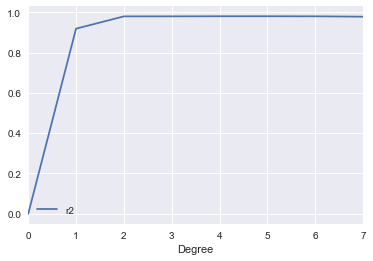

In [70]:
df_poly.reset_index().plot(x='index', y='r2')
plt.xlabel('Degree');

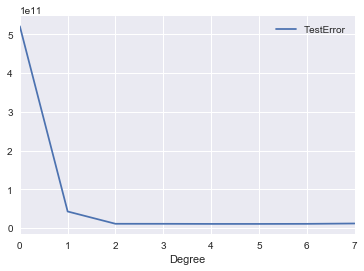

In [71]:
df_poly.reset_index().plot(x='index', y='TestError')
plt.xlabel('Degree');

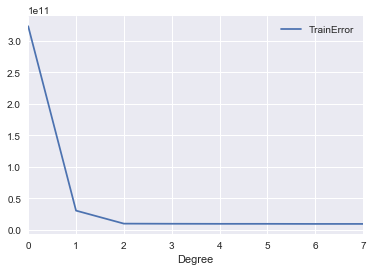

In [72]:
df_poly.reset_index().plot(x='index', y='TrainError')
plt.xlabel('Degree');

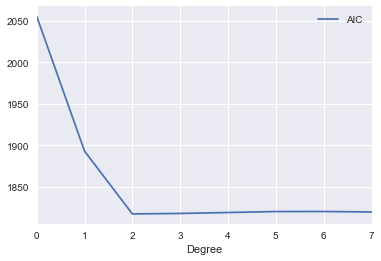

In [73]:
df_poly.reset_index().plot(x='index', y='AIC')
plt.xlabel('Degree');

### Challenge 4

In [74]:
lr_dict = {}

for i in range(5,len(X2)+1, 5):
    lr_model3.fit(X2_train_poly3[0:i],y2_train[0:i])
    pred_train = lr_model3.predict(X2_train_poly3)
    pred_test = lr_model3.predict(X2_test_poly3)
    
    lr_dict[i] = [mean_squared_error(y2_train, pred_train), mean_squared_error(y2_test, pred_test) ]

In [75]:
df_lr = pd.DataFrame.from_dict(lr_dict, orient='index')

In [76]:
df_lr

,0,1
5,1.767238e+10,2.523947e+10
10,1.054542e+10,1.151465e+10
15,1.374021e+10,1.807441e+10
20,1.258388e+10,1.361121e+10
25,1.078001e+10,1.046958e+10
30,1.064038e+10,1.051527e+10
35,1.040513e+10,1.049283e+10
40,1.034097e+10,1.041184e+10
45,1.023851e+10,1.046841e+10
50,1.030803e+10,1.044209e+10


In [77]:
df_lr = df_lr.rename(columns = {0:'TrainError', 1: 'TestError'})

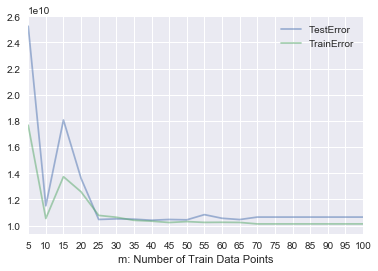

In [78]:
df_lr.reset_index().plot(x='index', y=['TestError', 'TrainError'], alpha=.5)
plt.xlabel('m: Number of Train Data Points')
plt.xticks(np.arange(5, 101, 5));